In [22]:
from construct import *
import matplotlib.pyplot as plt
import numpy as np

data_sections = Struct(
    "full_data" / Array(
        this._root.lengths.full_data_len,
        Float32l
    ),
    "mid_data" / Array(
        this._root.lengths.mid_data_len,
        Float32l
    ),
    "peak_data" / Array(
        this._root.lengths.peak_data_len,
        Float32l
    )
)

test_struct = Struct(
    "lengths" / Struct(
        "full_data_len" / Int32ul,
        "mid_data_len" / Int32ul,
        "peak_data_len" / Int32ul
    ),
    "data_sects" / data_sections
)

Full len: 100000


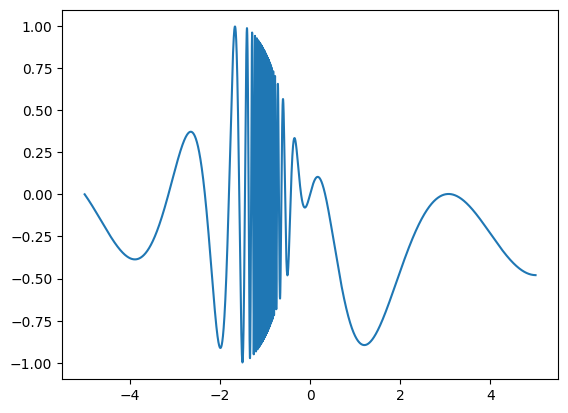

In [ ]:
def parse_file(input_path):
    with open(input_path, 'rb') as input_f:
        raw_data = input_f.read()
        parsed_data = test_struct.parse(raw_data)

        full_data_len = parsed_data.lengths.full_data_len
        full_data = parsed_data.data_sects.full_data
        print(f"Full len: {full_data_len}")

        plt.plot(np.linspace(-5, 5, full_data_len), full_data)


input_path = "wave_data.test"
parse_file(input_path)